# Valuations API Examples

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
signal_ocean_api_key = 'NotValid' #replace with your subscription key

## Retrieving a vessel valuation.
The Valuations API provides access to latest and historical SnP valuation of vessels.
There are 3 functions available:

1. Latest valuation for a given IMO
2. Details of latest valuation for a given IMO
3. All valuations for a given IMO

The IMO should be given as an input for the function.

In [2]:
from signal_ocean.vessel_valuations import VesselValuationsAPI

vessel_ValuationsAPI = VesselValuationsAPI()
vessel_imo = 9412036
latest_valuation = vessel_ValuationsAPI.get_latest_valuation_price(9412036)*1000000

print(f"Latest valuation for imo: {vessel_imo} is ${latest_valuation}")

Latest valuation for imo: 9412036 is $30888612.000000


Plot a trend on how the vessel valuation has changed over time.

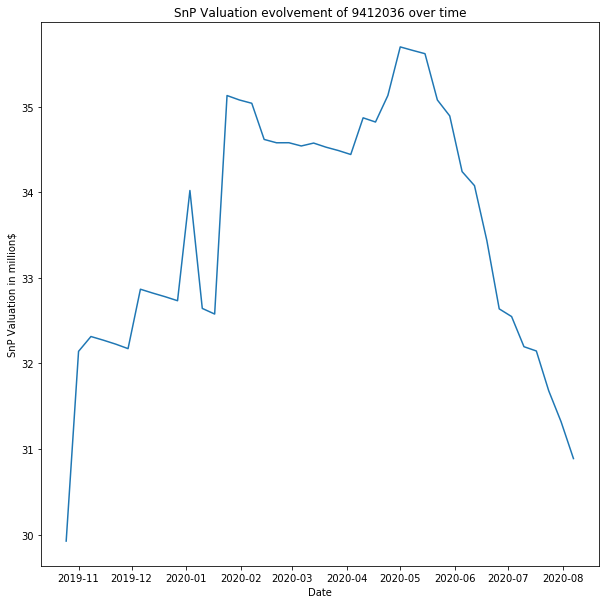

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

all_valuations = vessel_ValuationsAPI.get_valuations(vessel_imo)
dataf = pd.DataFrame([o.__dict__ for o in all_valuations])
dateTimeIndex= pd.DatetimeIndex(dataf['value_from'])

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dateTimeIndex,
        dataf['valuation_price'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="SnP Valuation in million$",
       title= f"SnP Valuation evolvement of {vessel_imo} over time")

plt.show()